## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
def build_mlp(input_shape, output_unit =10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    Input_layer = keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(Input_layer)
        else:
            x= keras.layers.Dense(units=n_units, activation='relu', name='hidden_layer'+str(i+1))(x)
    out = keras.layers.Dense(units=output_unit, activation='softmax', name= 'output_layer')(x)
    model = keras.models.Model(inputs=[Input_layer], outputs=[out])
    return model

In [5]:
"""Code Here
設定超參數
"""
Learning_rate = [1e-1,1e-2,1e-3,1e-4,1e-5]
Epochs=50
Batchsize=256
Momentum=0.95

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in Learning_rate:
    model = build_mlp(input_shape= x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr= lr, nesterov=False, momentum=Momentum)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    model.fit(x_train, y_train,
              epochs=Epochs,
              batch_size= Batchsize,
              validation_data=(x_test, y_test),
              shuffle = True)
    train_loss= model.history.history['loss']
    valid_loss= model.history.history['val_loss']
    train_acc= model.history.history['acc']
    valid_acc=model.history.history['val_acc']
    
    exp_name_tag = 'exp-lr-%s' %str(lr)
    results[exp_name_tag]={'train-loss':train_loss,
                          'valid-loss':valid_loss,
                          'train-acc':train_acc,
                          'vaild-acc':valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output_layer (Dense)         (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 235us/step - loss: 2

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.9035 - acc: 0.3102 - val_loss: 1.7638 - val_acc: 0.3722
Epoch 2/50
50000/50000 [==============================] - 12s 231us/step - loss: 1.6905 - acc: 0.3947 - val_loss: 1.6326 - val_acc: 0.4134
Epoch 3/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.5890 - acc: 0.4342 - val_loss: 1.5457 - val_acc: 0.4467
Epoch 4/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5400 - acc: 0.4505 - val_loss: 1.5412 - val_acc: 0.4525
Epoch 5/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4865 - acc: 0.4693 - val_loss: 1.4790 - val_acc: 0.4697
Epoch 6/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.4499 - acc: 0.4820 - val_loss: 1.5142 - val_acc: 0.4652
Epoch 7/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.4290 - acc: 0.4906 - val_loss: 1.

50000/50000 [==============================] - 12s 247us/step - loss: 2.0685 - acc: 0.2587 - val_loss: 1.8950 - val_acc: 0.3336
Epoch 2/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.8410 - acc: 0.3534 - val_loss: 1.7983 - val_acc: 0.3717
Epoch 3/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7534 - acc: 0.3866 - val_loss: 1.7423 - val_acc: 0.3927
Epoch 4/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.6975 - acc: 0.4030 - val_loss: 1.6620 - val_acc: 0.4198
Epoch 5/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.6441 - acc: 0.4241 - val_loss: 1.6346 - val_acc: 0.4284
Epoch 6/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.6070 - acc: 0.4362 - val_loss: 1.6070 - val_acc: 0.4380
Epoch 7/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5748 - acc: 0.4475 - val_loss: 1.5799 - val_acc: 0.4315
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 11s 216us/step - loss: 2.2541 - acc: 0.1691 - val_loss: 2.1789 - val_acc: 0.2188
Epoch 2/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.1314 - acc: 0.2477 - val_loss: 2.0889 - val_acc: 0.2687
Epoch 3/50
50000/50000 [==============================] - 12s 248us/step - loss: 2.0536 - acc: 0.2785 - val_loss: 2.0227 - val_acc: 0.2919
Epoch 4/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.9959 - acc: 0.3013 - val_loss: 1.9731 - val_acc: 0.3150
Epoch 5/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.9510 - acc: 0.3180 - val_loss: 1.9341 - val_acc: 0.3272
Epoch 6/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.9176 - acc: 0.3313 - val_loss: 1.9053 - val_acc: 0.3350
Epoch 7/50
50000/50000 [==============================] - 12s 241us/step - loss: 1.8908 - acc: 0.3381 - val_loss: 1.8820 - val_acc: 0.3442
Epoch 8/50
50000/50000 [==============

50000/50000 [==============================] - 10s 204us/step - loss: 2.2959 - acc: 0.1316 - val_loss: 2.2824 - val_acc: 0.1404
Epoch 3/50
50000/50000 [==============================] - 11s 212us/step - loss: 2.2753 - acc: 0.1421 - val_loss: 2.2654 - val_acc: 0.1545
Epoch 4/50
50000/50000 [==============================] - 11s 211us/step - loss: 2.2599 - acc: 0.1545 - val_loss: 2.2511 - val_acc: 0.1648
Epoch 5/50
50000/50000 [==============================] - 10s 201us/step - loss: 2.2467 - acc: 0.1655 - val_loss: 2.2385 - val_acc: 0.1772
Epoch 6/50
50000/50000 [==============================] - 11s 213us/step - loss: 2.2344 - acc: 0.1777 - val_loss: 2.2263 - val_acc: 0.1883
Epoch 7/50
50000/50000 [==============================] - 10s 208us/step - loss: 2.2227 - acc: 0.1904 - val_loss: 2.2148 - val_acc: 0.1992
Epoch 8/50
50000/50000 [==============================] - 10s 202us/step - loss: 2.2115 - acc: 0.1993 - val_loss: 2.2039 - val_acc: 0.2076
Epoch 9/50
50000/50000 [==============

exp-lr-0.1
exp-lr-0.01
exp-lr-0.001
exp-lr-0.0001
exp-lr-1e-05


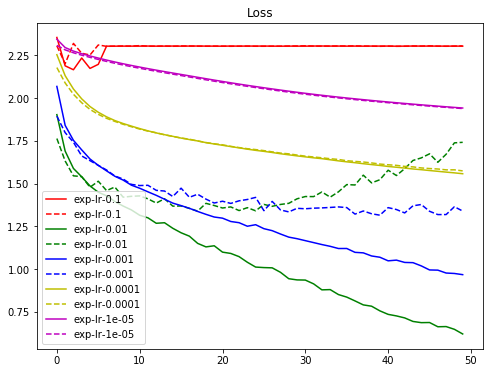

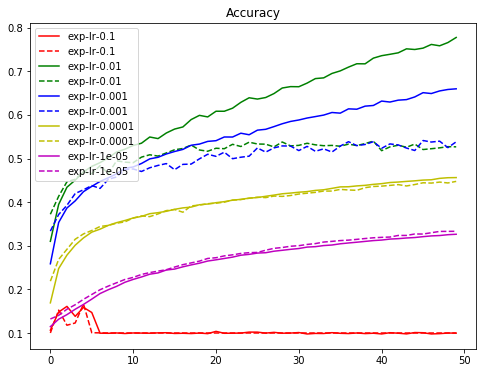

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    print (cond)#self
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['vaild-acc'])),results[cond]['vaild-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()